In [1]:
#Question 1 without using csv file


import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

years = np.arange(1965, 2023)
gold_prices = np.array([72,84,103,162,176,184,193,202,279,506,540,432,486,685,937,1330,1800,1645,1800,1970,2130,2140,2570,3130,3140,3200,3466,4334,4140,4598,4680,5160,4725,4045,4234,4400,4300,4990,5600,5850,7000,8400,10800,12500,14500,18500,26400,31050,29600,28006,26343,28623,29667,31438,35220,48651,50045,52950]) 
years = years.reshape(-1, 1)
gold_prices = gold_prices.reshape(-1, 1)

model = LinearRegression()
model.fit(years, gold_prices)

slope = model.coef_[0][0]
intercept = model.intercept_[0]

print("Fitted Simple Linear Regression Equation:")
print(f"Gold Price = {slope:.4f} * Year + {intercept:.4f}")

year_2025 = np.array([[2025]])
predicted_price_2025 = model.predict(year_2025)[0][0]
print(f"Predicted Gold Price for 2025: {predicted_price_2025:.2f}")

predictions = model.predict(years)
mse = mean_squared_error(gold_prices, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(gold_prices, predictions)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Fitted Simple Linear Regression Equation:
Gold Price = 675.3437 * Year + -1336226.7043
Predicted Gold Price for 2025: 31344.20
Mean Squared Error (MSE): 62644360.72
Root Mean Squared Error (RMSE): 7914.82
Mean Absolute Error (MAE): 6312.79


Fitted Multiple Linear Regression Equations:
Gold Price = 675.3437 * Year + 0.0000
Silver Price = 1388.7465 * Year + 0.0000
Predicted Gold Price for 2024: 30668.86
Predicted Silver Price for 2024: 51670.56
Errors for Gold Price:
Mean Squared Error (MSE): 62644360.72
Root Mean Squared Error (RMSE): 7914.82
Mean Absolute Error (MAE): 6312.79
Errors for Silver Price:
Mean Squared Error (MSE): 94697765.89
Root Mean Squared Error (RMSE): 9731.28
Mean Absolute Error (MAE): 8086.54


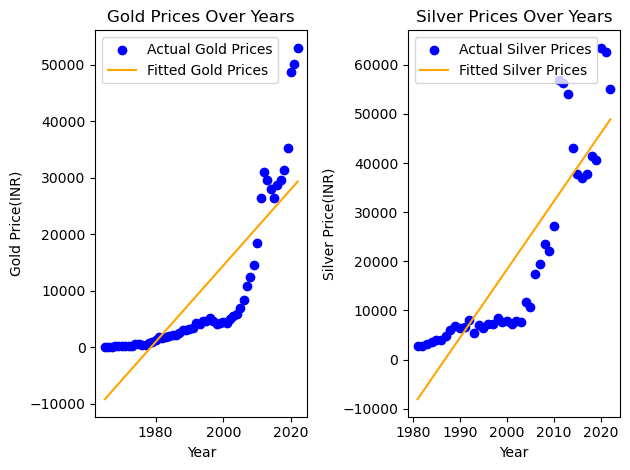

Predicted Gold Price for 2024: 30668.86090005841
Predicted Silver Price for 2024: 51670.55714015616


In [2]:
#Question 2 without using csv file


import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

gold_years = np.arange(1965, 2023)
gold_prices = np.array([72,84,103,162,176,184,193,202,279,506,540,432,486,685,937,1330,1800,1645,1800,1970,2130,2140,2570,3130,3140,3200,3466,4334,4140,4598,4680,5160,4725,4045,4234,4400,4300,4990,5600,5850,7000,8400,10800,12500,14500,18500,26400,31050,29600,28006,26343,28623,29667,31438,35220,48651,50045,52950]) 

silver_years = np.arange(1981, 2023)
silver_prices = np.array([2715,2720,3105,3570,3955,4015,4794,6066,6755,6463,6646,8040,5489,7124,6335,7346,7345,8560,7615,7900,7215,7875,7698,11770,10675,17405,19520,23625,22165,27255,56900,56290,54030,43070,37825,36990,37825,41400,40600,63435,62572,55100])  

gold_X = np.vstack((gold_years, np.ones(len(gold_years)))).T
silver_X = np.vstack((silver_years, np.ones(len(silver_years)))).T

gold_model = LinearRegression()
gold_model.fit(gold_X, gold_prices)

silver_model = LinearRegression()
silver_model.fit(silver_X, silver_prices)

gold_slope, gold_intercept = gold_model.coef_
silver_slope, silver_intercept = silver_model.coef_

print("Fitted Multiple Linear Regression Equations:")
print(f"Gold Price = {gold_slope:.4f} * Year + {gold_intercept:.4f}")
print(f"Silver Price = {silver_slope:.4f} * Year + {silver_intercept:.4f}")

year_2024 = np.array([[2024, 1]])
predicted_gold_price_2024 = gold_model.predict(year_2024)[0]
predicted_silver_price_2024 = silver_model.predict(year_2024)[0]

print(f"Predicted Gold Price for 2024: {predicted_gold_price_2024:.2f}")
print(f"Predicted Silver Price for 2024: {predicted_silver_price_2024:.2f}")

gold_predictions = gold_model.predict(gold_X)
silver_predictions = silver_model.predict(silver_X)

gold_mse = mean_squared_error(gold_prices, gold_predictions)
gold_rmse = np.sqrt(gold_mse)
gold_mae = mean_absolute_error(gold_prices, gold_predictions)

silver_mse = mean_squared_error(silver_prices, silver_predictions)
silver_rmse = np.sqrt(silver_mse)
silver_mae = mean_absolute_error(silver_prices, silver_predictions)

print("Errors for Gold Price:")
print(f"Mean Squared Error (MSE): {gold_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {gold_rmse:.2f}")
print(f"Mean Absolute Error (MAE): {gold_mae:.2f}")

print("Errors for Silver Price:")
print(f"Mean Squared Error (MSE): {silver_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {silver_rmse:.2f}")
print(f"Mean Absolute Error (MAE): {silver_mae:.2f}")
plt.subplot(1, 2, 1)
plt.scatter(gold_years, gold_prices, label='Actual Gold Prices', color='blue')
plt.plot(gold_years, gold_model.predict(gold_X), label='Fitted Gold Prices', color='orange')
plt.xlabel('Year')
plt.ylabel('Gold Price(INR)')
plt.title('Gold Prices Over Years')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(silver_years, silver_prices, label='Actual Silver Prices', color='blue')
plt.plot(silver_years, silver_model.predict(silver_X), label='Fitted Silver Prices', color='orange')
plt.xlabel('Year')
plt.ylabel('Silver Price(INR)')
plt.title('Silver Prices Over Years')
plt.legend()

plt.tight_layout()
plt.show()

print("Predicted Gold Price for 2024:", predicted_gold_price_2024)
print("Predicted Silver Price for 2024:", predicted_silver_price_2024)


Predicted Gold Price for 2024 (Per 1gm) = 4077.925168855523 INR
Predicted Silver Price for 2024 (Per 1gm) = 49.188319043152205 INR


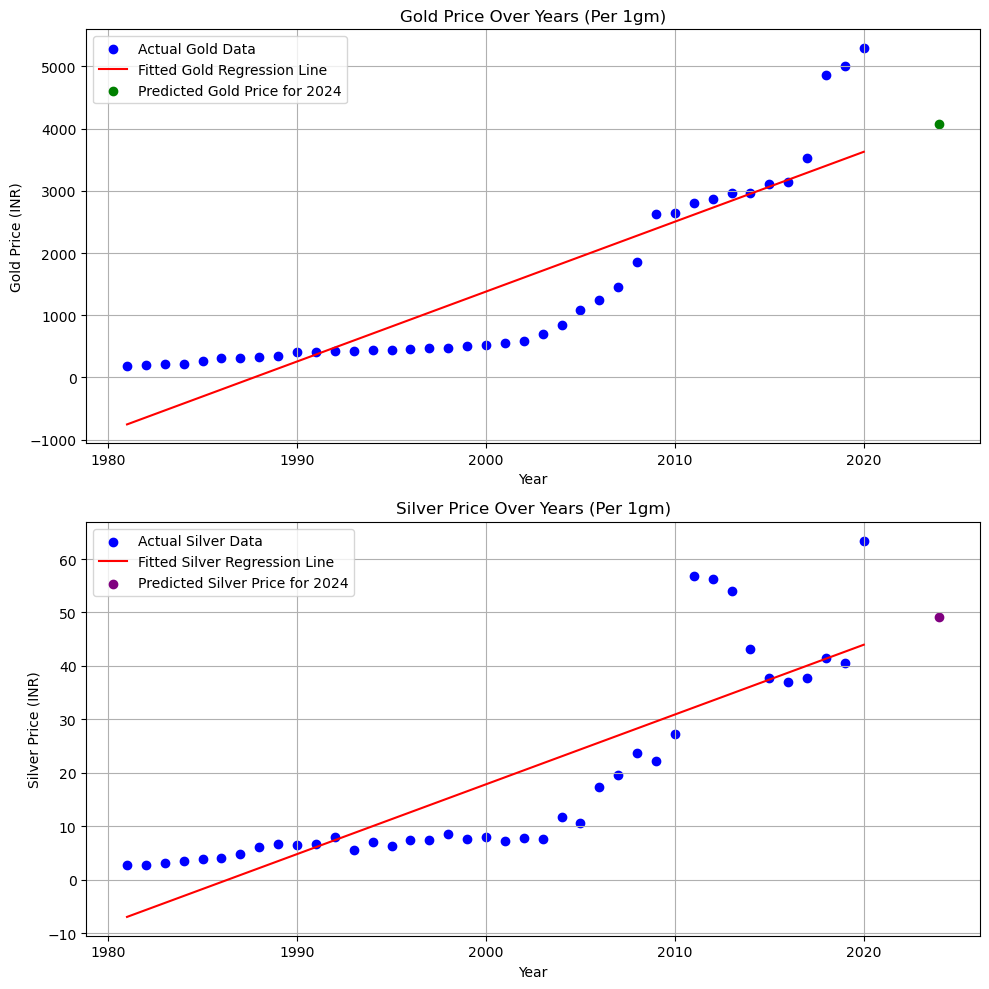

In [8]:
#question 2 using csv file


import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data = pd.read_csv('gold_silver _rate.csv')

data_cleaned = data.dropna(subset=['Silver_Price'])

X = data_cleaned['Year'].values.reshape(-1, 1)
y_gold = data_cleaned['Gold_price'].values / 10  
y_silver = data_cleaned['Silver_Price'].values / 1000  

model_gold = LinearRegression()
model_gold.fit(X, y_gold)

model_silver = LinearRegression()
model_silver.fit(X, y_silver)

predicted_price_gold_2024 = model_gold.predict([[2024]])[0]
predicted_price_silver_2024 = model_silver.predict([[2024]])[0]
print("Predicted Gold Price for 2024 (Per 1gm) =",predicted_price_gold_2024,"INR")
print("Predicted Silver Price for 2024 (Per 1gm) =",predicted_price_silver_2024,"INR")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ax1.scatter(X, y_gold, color='blue', label='Actual Gold Data')
ax1.plot(X, model_gold.predict(X), color='red', label='Fitted Gold Regression Line')
ax1.scatter(2024, predicted_price_gold_2024, color='green', label='Predicted Gold Price for 2024')
ax1.set_title('Gold Price Over Years (Per 1gm)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Gold Price (INR)')
ax1.legend()
ax1.grid()

ax2.scatter(X, y_silver, color='blue', label='Actual Silver Data')
ax2.plot(X, model_silver.predict(X), color='red', label='Fitted Silver Regression Line')
ax2.scatter(2024, predicted_price_silver_2024, color='purple', label='Predicted Silver Price for 2024')
ax2.set_title('Silver Price Over Years (Per 1gm)')
ax2.set_xlabel('Year')
ax2.set_ylabel('Silver Price (INR)')
ax2.legend()
ax2.grid()

plt.tight_layout()
plt.show()



In [ ]:
#Additional Question

import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import math

data = pd.read_csv('C:\Users\Bhavya\Desktop\Bhavya\Sem 5\ML\Lab\gold_silver_prices.csv')

data_cleaned = data.dropna(subset=['Silver_price'])

X = data_cleaned['Year'].values.reshape(-1, 1)
y_gold = data_cleaned['Gold_price'].values / 10  # Convert to price for 1 gram
y_silver = data_cleaned['Silver_price'].values / 1000  # Convert to price for 1 gram

model_gold = SGDRegressor(loss='squared_loss', max_iter=1000, random_state=0)
model_gold.fit(X, y_gold)

model_silver = SGDRegressor(loss='squared_loss', max_iter=1000, random_state=0)
model_silver.fit(X, y_silver)

predicted_price_gold_2025 = model_gold.predict([[2025]])[0]
predicted_price_gold_sgd_2025 = model_gold.coef_[0] * 2025 + model_gold.intercept_

predicted_price_silver_2024 = model_silver.predict([[2024]])[0]
predicted_price_silver_sgd_2024 = model_silver.coef_[0] * 2024 + model_silver.intercept_

sklearn_coeff_gold = [model_gold.intercept_, model_gold.coef_[0]]
sgd_coeff_gold = [model_gold.intercept_, model_gold.coef_[0]]

sklearn_coeff_silver = [model_silver.intercept_, model_silver.coef_[0]]
sgd_coeff_silver = [model_silver.intercept_, model_silver.coef_[0]]

error_gold = np.abs(sklearn_coeff_gold[1] - sgd_coeff_gold[1]) + np.abs(sklearn_coeff_gold[0] - sgd_coeff_gold[0])
error_silver = np.abs(sklearn_coeff_silver[1] - sgd_coeff_silver[1]) + np.abs(sklearn_coeff_silver[0] - sgd_coeff_silver[0])

predicted_gold_prices = model_gold.predict(X)
predicted_silver_prices = model_silver.predict(X)

mse_gold = mean_squared_error(y_gold, predicted_gold_prices)
mse_silver = mean_squared_error(y_silver, predicted_silver_prices)

rmse_gold = math.sqrt(mse_gold)
rmse_silver = math.sqrt(mse_silver)

print("Sklearn Coefficients (Gold):", sklearn_coeff_gold)
print("SGD Coefficients (Gold):", sgd_coeff_gold)
print("Error (Gold):", error_gold)
print("MSE (Gold):", mse_gold)
print("RMSE (Gold):", rmse_gold)
print("Predicted Gold Price in 2025:", predicted_price_gold_2025)
print("Predicted Gold Price in 2025 (SGD):", predicted_price_gold_sgd_2025)

print("Sklearn Coefficients (Silver):", sklearn_coeff_silver)
print("SGD Coefficients (Silver):", sgd_coeff_silver)
print("Error (Silver):", error_silver)
print("MSE (Silver):", mse_silver)
print("RMSE (Silver):", rmse_silver)
print("Predicted Silver Price in 2024:", predicted_price_silver_2024)
print("Predicted Silver Price in 2024 (SGD):", predicted_price_silver_sgd_2024)
